In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv("https://raw.githubusercontent.com/reddyprasade/Machine-Learning-Problems-DataSets/master/Classification/iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [30]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [32]:
x = df[['sepal_length','sepal_width','petal_length','petal_width']]
#x = df.drop("species",axis=1)
y = df["species"]

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
DTC = DecisionTreeClassifier()

In [37]:
DTC.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [38]:
yhat = DTC.predict(x_test)

In [39]:
importance = DTC.feature_importances_

Feature: 0, Score: 0.01273
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.44887
Feature: 3, Score: 0.53840


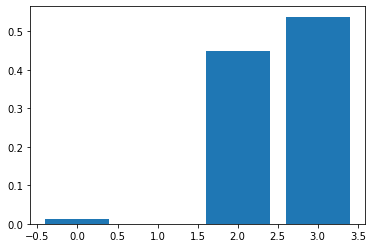

In [40]:
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))],importance)
plt.show()

# Confusion Matrix

In [41]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

In [42]:
cm = confusion_matrix(y_test,yhat)
cm

array([[16,  0,  0],
       [ 0,  9,  0],
       [ 0,  2, 11]], dtype=int64)

In [43]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.82      1.00      0.90         9
   virginica       1.00      0.85      0.92        13

    accuracy                           0.95        38
   macro avg       0.94      0.95      0.94        38
weighted avg       0.96      0.95      0.95        38



In [44]:
accuracy_score(y_test,yhat)

0.9473684210526315

In [45]:
from sklearn import tree

[Text(133.92000000000002, 201.90857142857143, 'X[3] <= 0.8\ngini = 0.665\nsamples = 112\nvalue = [34, 41, 37]'),
 Text(100.44000000000001, 170.84571428571428, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(167.40000000000003, 170.84571428571428, 'X[2] <= 4.85\ngini = 0.499\nsamples = 78\nvalue = [0, 41, 37]'),
 Text(100.44000000000001, 139.78285714285715, 'X[0] <= 4.95\ngini = 0.051\nsamples = 38\nvalue = [0, 37, 1]'),
 Text(66.96000000000001, 108.72, 'X[2] <= 3.9\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(33.480000000000004, 77.65714285714284, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(100.44000000000001, 77.65714285714284, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(133.92000000000002, 108.72, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(234.36, 139.78285714285715, 'X[3] <= 1.75\ngini = 0.18\nsamples = 40\nvalue = [0, 4, 36]'),
 Text(200.88000000000002, 108.72, 'X[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(167.400000

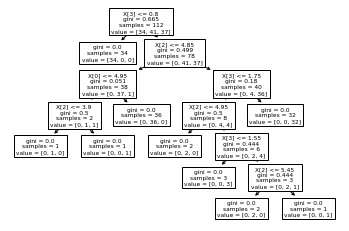

In [46]:
tree.plot_tree(DTC)

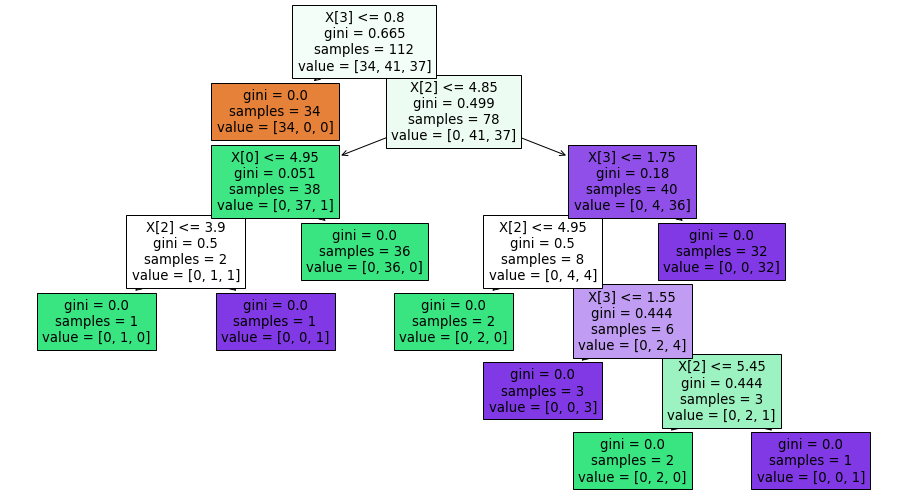

In [47]:
plt.figure(figsize=(16,9))
tree.plot_tree(DTC,filled=True)
plt.show()